In [1]:
#baseline
from sklearn.linear_model import Lasso

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [375]:
import pandas as pd
import seaborn as sns
import numpy as np

In [380]:
df = pd.read_pickle('X_1000.pkl')

In [383]:
len(df.columns)

90

<AxesSubplot:>

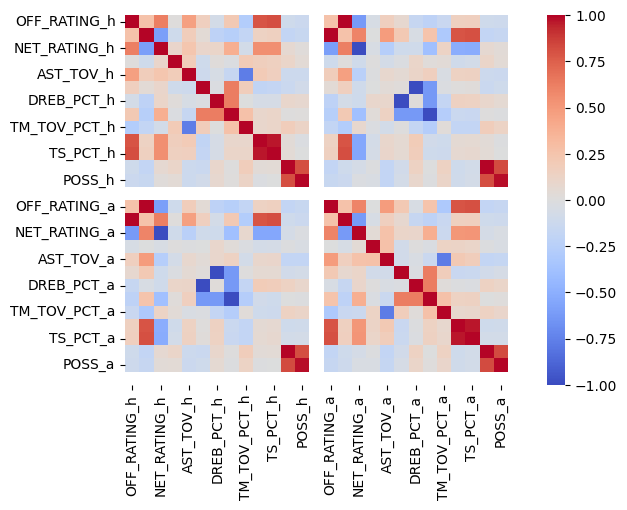

In [384]:
sns.heatmap(df.iloc[:, 0:30].corr(), cmap='coolwarm')

In [ ]:
features_adv_team = ['TEAM_ID', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 
            'AST_PCT', 'AST_TOV', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 
            'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'PACE', 'POSS']

In [41]:
df_selected = df[['GAME_ID','TEAM_ID', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 
            'AST_PCT', 'AST_TOV', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 
            'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'PACE', 'POSS']]

In [42]:
corr_matrix = df_selected.corr().abs()

In [43]:
upper_tri = np.triu(np.ones_like(corr_matrix))

<AxesSubplot:>

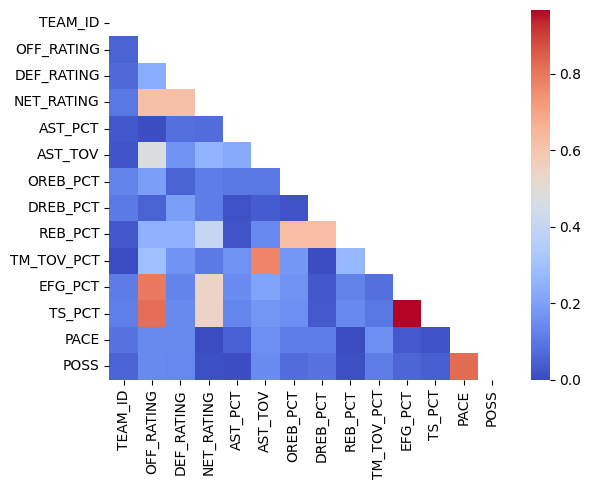

In [44]:
sns.heatmap(corr_matrix, cmap='coolwarm', mask=upper_tri)

In [45]:
df_selected = df_selected.drop('TS_PCT', axis=1)

In [52]:
df_selected = df_selected.astype({'GAME_ID': 'int64'})

In [53]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 4 to 1999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GAME_ID     1996 non-null   int64  
 1   TEAM_ID     1996 non-null   int64  
 2   OFF_RATING  1996 non-null   float64
 3   DEF_RATING  1996 non-null   float64
 4   NET_RATING  1996 non-null   float64
 5   AST_PCT     1996 non-null   float64
 6   AST_TOV     1996 non-null   float64
 7   OREB_PCT    1996 non-null   float64
 8   DREB_PCT    1996 non-null   float64
 9   REB_PCT     1996 non-null   float64
 10  TM_TOV_PCT  1996 non-null   float64
 11  EFG_PCT     1996 non-null   float64
 12  PACE        1996 non-null   float64
 13  POSS        1996 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 218.4 KB


In [87]:
df_merged = pd.merge(df_selected, df_raw, on=['GAME_ID', 'TEAM_ID'], how='inner')[['TEAM_ID', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 
            'AST_PCT', 'AST_TOV', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 
            'TM_TOV_PCT', 'EFG_PCT', 'PACE', 'POSS','PTS']]

df_merged.astype({'TEAM_ID':object})

,TEAM_ID,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TOV,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,PACE,POSS,PTS
0,1610612764,111.0,114.7,-3.7,0.457,2.33,0.339,0.848,0.556,9.0,0.463,101.0,100,111
1,1610612749,114.7,111.0,3.7,0.769,2.50,0.152,0.661,0.444,11.8,0.602,101.0,102,117
2,1610612747,114.1,106.1,8.1,0.690,3.22,0.309,0.754,0.536,9.1,0.500,99.0,99,113
3,1610612744,106.1,114.1,-8.1,0.750,2.08,0.246,0.691,0.464,13.1,0.495,99.0,99,105
4,1610612756,134.0,128.6,5.4,0.551,3.00,0.317,0.829,0.573,9.3,0.618,97.5,97,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1610612743,111.5,109.4,2.1,0.568,1.75,0.308,0.708,0.500,12.5,0.518,96.0,96,107
1992,1610612748,111.3,102.8,8.5,0.737,1.75,0.304,0.654,0.472,15.1,0.511,106.5,106,118
1993,1610612745,102.8,111.3,-8.5,0.659,1.08,0.346,0.696,0.528,23.4,0.538,106.5,107,110
1994,1610612755,114.1,99.0,15.2,0.575,2.09,0.275,0.679,0.481,11.1,0.533,98.5,99,113


In [374]:
df_merged.to_csv('planned_x&y.csv')

<AxesSubplot:>

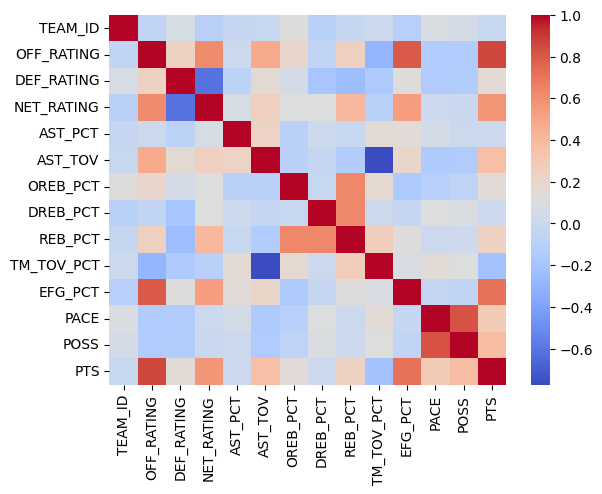

In [313]:
sns.heatmap(final_df[['TEAM_ID', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 
            'AST_PCT', 'AST_TOV', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 
            'TM_TOV_PCT', 'EFG_PCT', 'PACE', 'POSS','PTS']].corr(), cmap='coolwarm')

In [99]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(enc.fit_transform(df_merged[['TEAM_ID']]).toarray())
final_df = df_merged.join(encoder_df)

In [372]:
final_df

,TEAM_ID,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TOV,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,...,20,21,22,23,24,25,26,27,28,29
0,1610612764,111.0,114.7,-3.7,0.457,2.33,0.339,0.848,0.556,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1610612749,114.7,111.0,3.7,0.769,2.50,0.152,0.661,0.444,11.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1610612747,114.1,106.1,8.1,0.690,3.22,0.309,0.754,0.536,9.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1610612744,106.1,114.1,-8.1,0.750,2.08,0.246,0.691,0.464,13.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1610612756,134.0,128.6,5.4,0.551,3.00,0.317,0.829,0.573,9.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1610612743,111.5,109.4,2.1,0.568,1.75,0.308,0.708,0.500,12.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992,1610612748,111.3,102.8,8.5,0.737,1.75,0.304,0.654,0.472,15.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993,1610612745,102.8,111.3,-8.5,0.659,1.08,0.346,0.696,0.528,23.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994,1610612755,114.1,99.0,15.2,0.575,2.09,0.275,0.679,0.481,11.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
X = final_df.drop(['PTS', 'TEAM_ID', 'OFF_RATING', 'EFG_PCT'], axis=1)
y = final_df['PTS']
X.columns = X.columns.astype(str)

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [316]:
from sklearn.preprocessing import MinMaxScaler
mx_scaler = MinMaxScaler()
X_train = mx_scaler.fit_transform(X_train)
X_test = mx_scaler.transform(X_test)

In [317]:
y_true_mean = y.mean()

In [369]:
solver = "highs"
regression = QuantileRegressor(quantile=0.5, alpha=0.035, solver=solver)
y_pred = regression.fit(X_train, y_train).predict(X_test)
r2_score(y_test, y_pred)

-0.022685698280748845

In [371]:
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
solver = "highs"
quantiles = [0.025, 0.5, 0.975]
predictions = {}
scores = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0.0034, solver=solver)
    y_pred = qr.fit(X_train, y_train).predict(X_test)
    predictions[quantile] = y_pred
    scores[quantile] = cross_val_score(qr, X_train, y_train, cv=5, scoring='r2')

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_test
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_test
        )
#reg = QuantileRegressor(quantile=0.5, alpha=0.0377,solver=solver).fit(X_train, y_train)

In [342]:
print(scores[0.025])
print(scores[0.5])
print(scores[0.975])

[0.98539357 0.98592307 0.98312224 0.98816419 0.98032589]
[0.99782352 0.99799333 0.99643347 0.9977891  0.99706296]
[0.98945547 0.98960264 0.98686393 0.9834956  0.98989702]


In [257]:
obs_test = np.array(y_test)

In [258]:
import quantile_scoring as scr
alpha_test=0.2
scr.interval_score(obs_test,alpha_test,q_left=predictions[0.025],q_right=predictions[0.975])

(array([16.36763519,  5.44255296,  3.20084101,  6.17468916,  5.47026593,
         4.02756826,  7.18473576, 23.54181868,  4.48211095,  6.10996279,
         4.50872845,  5.91175358,  6.71291957,  3.95299262,  5.49449979,
         5.13884938,  5.48629481,  4.91874855, 16.87385564,  5.73136669,
         6.4248452 ,  3.95001878,  2.65198059,  4.83162313,  4.20553012,
         1.36992991,  4.21675034, 30.44045704,  2.32935924,  6.71370032,
         5.33252324,  5.21905582,  5.06212204,  8.36688149, 10.35913277,
         3.94259454,  5.27205672, 18.10004325,  7.91077729,  2.62082992,
         3.71663098,  9.63660984,  4.15811864, 24.75795115,  7.1591745 ,
        11.12075974,  6.15737428,  8.79930063,  2.03573685,  6.62712372,
         7.10883056,  5.93997397,  5.18786375,  2.04480536,  3.99426588,
         6.90151145,  5.19263103,  3.92871736,  2.69329741,  4.96111944,
         7.24199651,  5.61121439,  4.25481782,  5.13884938,  5.84166973,
         4.52205681,  7.28010755,  3.41159783,  5.1

In [335]:
X_2 = df_merged.drop(['PTS', 'TEAM_ID', 'OFF_RATING', 'EFG_PCT'], axis=1)
y_2 = df_merged['PTS']

In [336]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, random_state=0, test_size=0.2)

In [337]:
mx_scaler2 = MinMaxScaler()
X2_train = mx_scaler.fit_transform(X2_train)
X2_test = mx_scaler.transform(X2_test)

In [338]:
y2_true_mean = y_2.mean()

In [345]:
predictions2 = {}
scores2 = {}
out_bounds_predictions = np.zeros_like(y2_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr2 = QuantileRegressor(quantile=quantile, alpha=0.005, solver=solver)
    y2_pred = qr.fit(X2_train, y2_train).predict(X2_test)
    predictions2[quantile] = y2_pred
    scores2[quantile] = cross_val_score(qr2, X2_train, y2_train, cv=5, scoring='r2')

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y2_pred >= y2_test
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y2_pred <= y2_test
        )

In [346]:
print(scores2[0.025])
print(scores2[0.5])
print(scores2[0.975])

[-3.28337394 -3.79601085 -3.50640535 -3.37807261 -3.08342673]
[0.99762027 0.99778954 0.99588966 0.99770141 0.99662594]
[-3.61416404 -3.66402199 -3.81771701 -5.11401248 -3.98919511]
